In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import io

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D
from tensorflow.keras.utils import to_categorical
import theano

In [4]:
uploaded = files.upload()

Saving reduced_scale_data.csv to reduced_scale_data.csv


In [5]:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
# pre_df = pd.read_csv(io.BytesIO(uploaded['preprocessed_data.csv']))
# pre_df["Winner"] = pre_df["Winner"].map({"Red":0, "Blue": 1})
# y = pre_df["Winner"]
# x = pre_df.drop('Winner', 1)
print(uploaded.keys())
df = pd.read_csv(io.BytesIO(uploaded["reduced_scale_data.csv"]))
y = df["target"]
x = df.drop('target', 1)
print(x.shape)
df.head()

dict_keys(['reduced_scale_data.csv'])
(5061, 27)


,target,B_Stance_Sideways,B_win_by_Decision_Split,B_Reach_cms,R_Reach_cms,R_win_by_Decision_Split,B_avg_opp_HEAD_landed,R_Stance_Switch,R_3_round_losses,R_age,B_age,R_avg_DISTANCE_landed,B_avg_opp_TD_pct,R_avg_opp_SIG_STR_landed,B_weight_height_rat,R_win_pct,R_avg_TOTAL_STR_pct,B_avg_TD_att,R_avg_TOTAL_BODY_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_DISTANCE_landed,R_avg_TOTAL_DISTANCE_pct,B_avg_TD_landed,B_avg_TOTAL_HEAD_pct,R_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_landed,R_weight_height_rat,B_avg_GROUND_landed
0,0,-0.019883,2.857270,-0.219693,0.170678,1.501603,0.208738,-0.183578,-0.150687,0.424155,0.559686,0.372148,-0.781859,-0.139090,-0.761408,0.953630,-0.240962,0.949587,0.362611,0.680249,0.765270,0.399647,0.616309,-0.404095,-0.440311,0.145834,-0.852834,0.160667
1,0,-0.019883,1.194363,-0.107054,0.129871,3.405790,-0.187371,-0.183578,2.285814,0.575412,0.369248,1.701819,-0.348959,1.387418,-1.214224,-0.120685,0.069314,0.893451,0.624133,1.601896,1.160696,0.263960,1.044369,-0.570434,0.088292,1.560817,-1.196279,1.820299
2,1,-0.028124,-0.402585,0.415520,0.456146,1.194363,0.927656,-0.174166,-0.326361,1.130999,1.180442,2.085205,-0.587399,0.676381,-0.676407,1.162038,-0.061309,0.017911,-0.047477,0.615983,1.572524,0.380601,-0.183422,0.628787,-0.419412,0.488053,-0.582215,-0.097878
3,0,-0.028124,-0.402585,0.170678,0.005586,1.194363,0.628858,-0.174166,0.211481,-0.011627,-0.332133,1.540054,-0.450399,1.183945,-0.922036,0.610071,-0.258593,0.146947,0.284273,0.693372,0.840881,0.510845,0.293377,0.007506,-1.004675,-0.019821,-0.761408,1.107208
4,0,-0.028124,-0.402585,0.415520,0.399826,-0.468545,3.253924,-0.174166,-0.864203,-0.582940,0.575412,0.493751,-0.843825,-0.058360,2.492127,0.610071,0.112557,-0.805465,0.620155,2.480471,4.898553,0.555590,-0.747523,0.595418,-1.004675,1.804039,2.782875,-0.783180


In [0]:
cols = df.columns.values
cols.sort()
[print(col[2:]) for col in cols if col[0] == "B"]
# R_cols, B_cols, other = [], [], []
# for col in cols:
#   if "R_" == col[:2]:
#     R_cols.append(col)
#   elif "B_" == col[:2]:
#     B_cols.append(col)
#   else:
#     other.append(col)
# print(other)
# print(R_cols)

In [0]:
def analyze_con_mat(con_mat):
  total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
  class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
  class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
  print('Total accuracy: %.5f' % total_accuracy)
  print('Class1 accuracy: %.5f' % class1_accuracy)
  print('Class2 accuracy: %.5f' % class2_accuracy)
  print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

def plot_roc(fpr, tpr, roc_auc, model_name):
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of '+model_name)
  plt.show()

def plot_confusion(cm, classes, model):
    plt.close()
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix for '+model,
           ylabel='True label',
           xlabel='Predicted label')
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

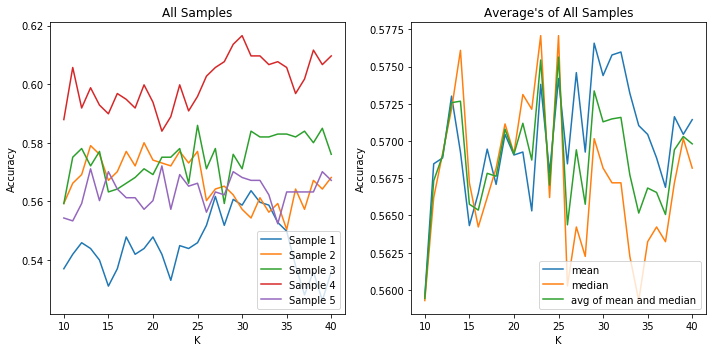

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix
from statistics import mean, median
import matplotlib.pyplot as plt

# print(classification_report(y_test, y_pred))

%matplotlib inline
acc = []
for k in range(10, 41):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
  acc.append(scores)
mean_acc = [mean(i) for i in acc]
med_acc = [median(i) for i in acc]
comb = [sum(i)/2 for i in zip(mean_acc, med_acc)]
# plot to see clearly
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(list(range(10, 41)), acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('All Samples')
plt.gca().legend(["Sample "+str(i+1) for i in range(len(acc))], loc="lower right")


plt.subplot(1, 2, 2)
plt.title('Average\'s of All Samples')
plt.plot(list(range(10, 41)), mean_acc, label="mean")
plt.plot(list(range(10, 41)), med_acc, label="median")
plt.plot(list(range(10, 41)), comb, label="avg of mean and median")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()
plt.close()

The best accuracy is found at k = 25 with and mean cross-validated accuracy of 0.57 and median 0.58


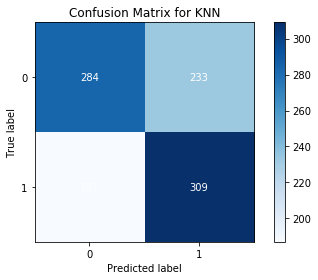

Total accuracy: 0.58539
Class1 accuracy: 0.54932
Class2 accuracy: 0.62298
Geometric mean accuracy: 0.58500


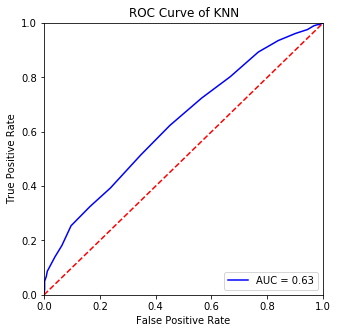

{'precision': 0.5167620589086189, 'recall': 0.516719832158233, 'f1-score': 0.516595184073776, 'support': 1013}


In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.utils.multiclass import unique_labels
import math
comb_acc = [sum(i) for i in zip(mean_acc, med_acc)]
comb_idx = comb_acc.index(max(comb_acc))
best_k = range(10,41)[comb_idx]
print(f"The best accuracy is found at k = {best_k} with and mean cross-validated accuracy of \
{round(mean_acc[comb_idx],2)} and median {round(med_acc[comb_idx],2)}")

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
con_mat = confusion_matrix(y_test, [round(i) for i in y_scores[:, 1]], [0,1])
classes = unique_labels(y_test, [round(i) for i in y_scores[:, 1]])

plot_confusion(con_mat, classes, "KNN")

analyze_con_mat(con_mat)
# plt.subplot(1, 2, 2)
# plt.tight_layout()
plt.close()
plt.figure(figsize=(5,5))
plot_roc(fpr, tpr, roc_auc, "KNN")
print(classification_report(y_test, [round(i) for i in y_pred], output_dict=True)['macro avg'])

In [0]:

# Import the model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, Nadam
from keras.utils import to_categorical
def build_model(num_features,type):
    model = Sequential()
#   if type == 0:
#     model.add(Dense(20, input_shape=(num_features,), activation='relu'))
#     model.add(Dense(40, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(type, input_shape=(num_features,), activation='relu'))
    model.add(Dense(type, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Adam optimizer with learning rate of 0.001
    optimizer = Adam(lr=0.001)
    model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
# model = None
# for i in [20]:
#   # Train the model
#   model = build_model(27, 10)
#   model.fit(x_train, y_train, verbose=0, batch_size=100, epochs=100)

# results = model.evaluate(x_test, y_test)
# # print(results[0])
# # print(results[1])

# y_pred = model.predict(x_test)
# print(classification_report(y_test, [round(i[0]) for i in y_pred], output_dict=True)["accuracy"])

# con_mat = confusion_matrix(y_test, [round(i[0]) for i in y_pred], [0,1])
# classes = unique_labels(y_test, [round(i[0]) for i in y_pred])
# plot_confusion(con_mat, classes, "MLP")
# analyze_con_mat(con_mat)

# fpr, tpr, threshold = roc_curve(y_test, y_pred)
# print(y_pred[1])
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(5,5))
# plot_roc(fpr, tpr, roc_auc, "MLP")
print(classification_report(y_test, [round(i[0]) for i in y_pred], output_dict=True)['macro avg'])

{'precision': 0.5317707476437822, 'recall': 0.5316216089767083, 'f1-score': 0.5307372352823573, 'support': 1013}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


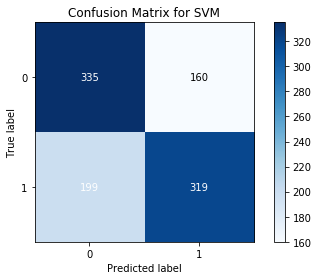

Total accuracy: 0.64561
Class1 accuracy: 0.67677
Class2 accuracy: 0.61583
Geometric mean accuracy: 0.64558
0.6461604016393087


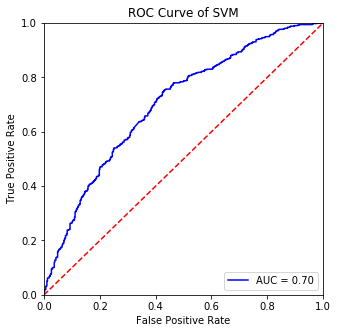

{'precision': 0.646655798206313, 'recall': 0.6462988962988963, 'f1-score': 0.6455186745854669, 'support': 1013}


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
# acc = []
# for svclassifier in [SVC(kernel='poly', degree=8), SVC(kernel='rbf'), SVC(kernel='sigmoid')]:
#   svclassifier.fit(x_train, y_train)
#   y_pred = svclassifier.predict(x_test)
# #   print(confusion_matrix(y_test, y_pred))
#   print(classification_report(y_test, y_pred, output_dict=True)["accuracy"])
# objects = ('Poly (8 degrees)', 'RBF', 'Sigmoid')
# y_pos = np.arange(len(objects))
# performance = acc

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Accuracy')
# plt.title('Comparison of SVM Kernels')
# plt.show()

sv = SVC(kernel='rbf', probability=True)
sv.fit(x_train, y_train)
y_pred = sv.predict_proba(x_test)
y_pred = y_pred[:,1]
con_mat = confusion_matrix(y_test, [round(i) for i in y_pred], [0,1])
plot_confusion(con_mat, classes, "SVM")
analyze_con_mat(con_mat)

print(y_pred[0])
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.close()
plt.figure(figsize=(5,5))
plot_roc(fpr, tpr, roc_auc, "SVM")
print(classification_report(y_test, [round(i) for i in y_pred], output_dict=True)['macro avg'])

In [35]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
# acc = []
# for i in range(15,50):
#     regressor = RandomForestRegressor(n_estimators=i, random_state=0)
#     regressor.fit(x_train, y_train)
#     y_pred = regressor.predict(x_test)
#     acc.append(accuracy_score(y_test, [round(i) for i in y_pred]))
# plt.close()
# plt.title('# of Trees vs. Accuracy')
# plt.plot(list(range(15, 50)), acc)
# plt.xlabel('# of Trees')
# plt.ylabel('Accuracy')
# plt.legend(loc = 'lower right')
# plt.show

regressor = RandomForestRegressor(n_estimators=22, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
# accuracy_score(y_test, [round(i) for i in y_pred])
# con_mat = confusion_matrix(y_test, [round(i) for i in y_pred], [0,1])
# plot_confusion(con_mat, classes, "Random Forest")
# analyze_con_mat(con_mat)

# print(y_pred[0])
# fpr, tpr, threshold = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.close()
# plt.figure(figsize=(5,5))
# plot_roc(fpr, tpr, roc_auc, "Random Forest")

print(classification_report(y_test, [round(i) for i in y_pred], output_dict=True)['macro avg'])

{'precision': 0.6865676879049929, 'recall': 0.6872056085003835, 'f1-score': 0.6859190359190359, 'support': 1013}
